<a href="https://colab.research.google.com/github/GuiCoelhoDev/CoronaryDisease_Analysis/blob/main/Projeto1_160123046.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and Load Dataset


In [43]:
import io
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
uploaded = files.upload()
df_not_preprocessed = pd.read_csv(io.BytesIO(uploaded['SA_heart.csv']))


Saving SA_heart.csv to SA_heart (2).csv


In [45]:
df_not_preprocessed

,id,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


# Pre Processing Data
Referências
https://towardsdatascience.com/data-normalization-with-pandas-and-scikit-learn-7c1cc6ed6475

In [46]:
# Transformando a feature 'famhist' em numérica para os modelos funcionarem
df=df_not_preprocessed
df['famhist']= df['famhist'].apply(lambda x: 1 if x=='Present' else 0)
df = df.drop(columns=['id'])
df


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,0,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,0,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,0,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,0,64,27.35,23.97,40,0


# Questão 1 - Quantidades médias e Desvios padrões das variáveis
Referências:

https://megapteraphile.wordpress.com/2015/11/03/plotting-means-and-stds-with-pandas/

https://www.youtube.com/watch?v=3Yh4U5OB5Sk

In [47]:
mean_contents = df.describe().loc['mean']
std_contents = df.describe().loc['std']

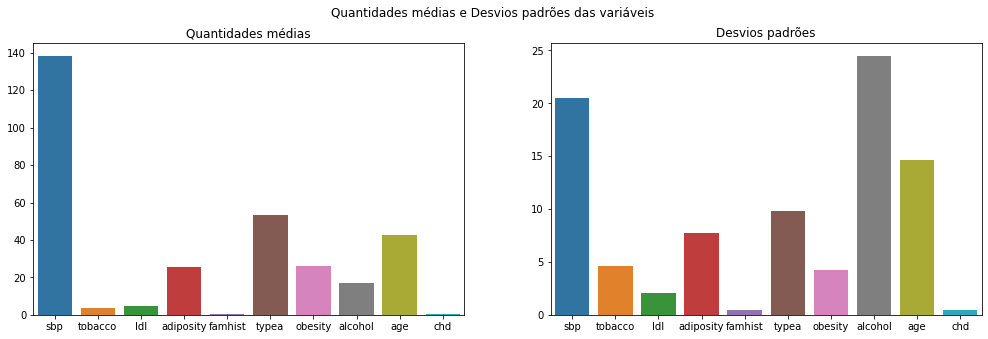

In [48]:
#@title Gráficos das Quantidades médias e Desvios padrões das variáveis
fig, axes = plt.subplots(1,2, figsize=(17,5))
fig.suptitle('Quantidades médias e Desvios padrões das variáveis')

sns.barplot(ax=axes[0], x=mean_contents.keys(), y = mean_contents.values)
axes[0].set_title("Quantidades médias")
sns.barplot(ax=axes[1], x=std_contents.keys(), y = std_contents.values)
axes[1].set_title("Desvios padrões")

plt.show()

Considerando esses resultados, percebe-se que não é possivel tirar grandes conclusões pelo fato dos valores de cada coluna não estarem normalizados. Portanto, vamos normaliza-los.

In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_normalized

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,0.504274,0.384615,0.331010,0.457902,1.0,0.553846,0.332497,0.660371,0.755102,1.0
1,0.367521,0.000321,0.239024,0.611748,0.0,0.646154,0.444479,0.013996,0.979592,1.0
2,0.145299,0.002564,0.174216,0.714406,1.0,0.600000,0.452949,0.025885,0.632653,0.0
3,0.589744,0.240385,0.378397,0.875245,1.0,0.584615,0.542346,0.164821,0.877551,1.0
4,0.282051,0.435897,0.175610,0.588531,1.0,0.723077,0.354141,0.389565,0.693878,1.0
...,...,...,...,...,...,...,...,...,...,...
457,0.965812,0.012821,0.348432,0.698741,0.0,0.784615,0.431305,0.000000,0.877551,0.0
458,0.692308,0.134615,0.239024,0.709371,0.0,0.600000,0.436324,0.127183,0.755102,1.0
459,0.059829,0.096154,0.042509,0.237483,0.0,0.415385,0.169072,0.180991,0.816327,0.0
460,0.145299,0.173077,0.740767,0.672727,0.0,0.784615,0.396801,0.162851,0.510204,0.0


Agora, vamos plotar os gráficos de novo

In [50]:
mean_contents = df_normalized.describe().loc['mean']
std_contents = df_normalized.describe().loc['std']

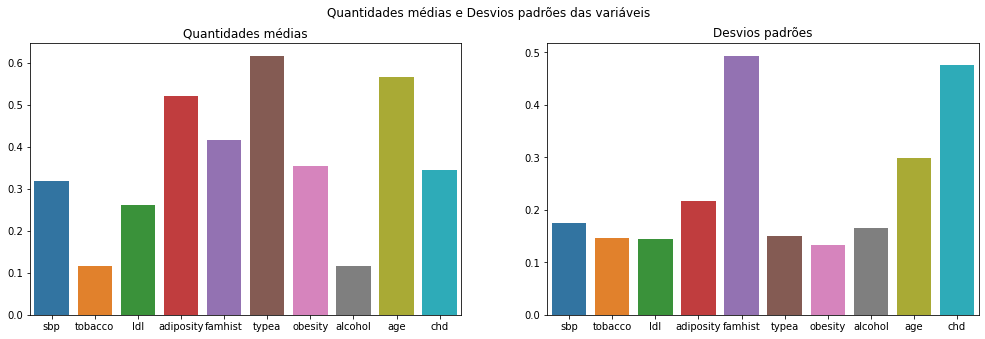

In [51]:
fig, axes = plt.subplots(1,2, figsize=(17,5))
fig.suptitle('Quantidades médias e Desvios padrões das variáveis')

sns.barplot(ax=axes[0], x=mean_contents.keys(), y = mean_contents.values)
axes[0].set_title("Quantidades médias")

sns.barplot(ax=axes[1], x=std_contents.keys(), y = std_contents.values)
axes[1].set_title("Desvios padrões")

plt.show()

Com os dados normalizados, podemos perceber que o atributo 'famhist' (Que ou está presente ou ausente) é mais ausente do que presente pois sua média é menor que 0,5. Faz sentido seu desvio padrão ser alto pois seu valor ou é 1 (Presente) ou é 0 (Ausente).

Apesar dessas análises, não é possível ver quais atributos são mais relevantes para saber se uma pessoa tem ou não chd.

Portanto, apesar do projeto não pedir, faz sentido fazermos histogramas.

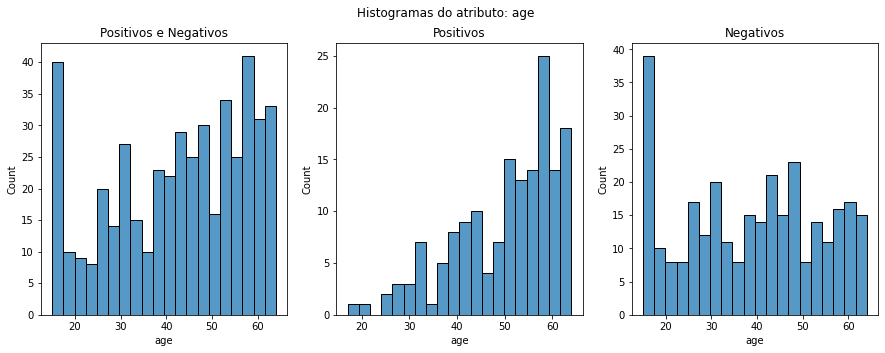

In [52]:
tested_positive = df.query('chd == 1')
tested_negative = df.query('chd == 0')

preditor_selecionado = 'age' #@param ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age']

fig, axes = plt.subplots(1,3, figsize=(15,5))
fig.suptitle('Histogramas do atributo: {}'.format(preditor_selecionado))
sns.histplot(ax = axes[0], data=df, x=preditor_selecionado, bins=20)
axes[0].set_title("Positivos e Negativos")

sns.histplot(ax = axes[1],data=tested_positive, x=preditor_selecionado, bins=20)
axes[1].set_title("Positivos")

sns.histplot(ax = axes[2],data=tested_negative, x=preditor_selecionado, bins=20)
axes[2].set_title("Negativos")
plt.show()


Baseado nos histogramas acima (em que pode ser escolhido o atributo a ser análisado) pode-se concluir:


1.   Quanto maior a idade, maior a chance de ser testado positivo
2.   alcohol, sbp, e ldl (foi percebido que o ldl é um ótimo preditor na Questão 5) não parecem ser preditores muito úteis para classificação.
3.   A variável famhist é mais presente quando o paciente é testado positivamente. Enquanto a variável é mais ausente quando o paciente é testado negativamente.
4.  Incrivelmente, o fator obesidade e alcohol não é um preditor tão impactante quanto a idade, por exemplo.
5.  Inicialmente, achava que quanto maior o alcohol, obesity, tobacco, maior a chance de ser positivo. Porém, ao analisar os histogramas, percebe-se que a lógica é inversa. No caso do tobacco por exemplo, a maior parte se encontra perto do 0. E poucos se encontram perto de 40. Portanto, acredito que quanto menor o valor dessa variável, mais tabaco ela ingeriu. Pois não faz sentido pessoas que usarem mais tabaco terem menos chance de pegar do que quem não usou. Essa lógica se repete para alcohol
6. Percebe-se também que pacientes com ldl acima de 12 possuem muita chance de serem testados positivos para chd



A título de curiosidade, será feito a mesma análises de histogramas para os dados normalizados

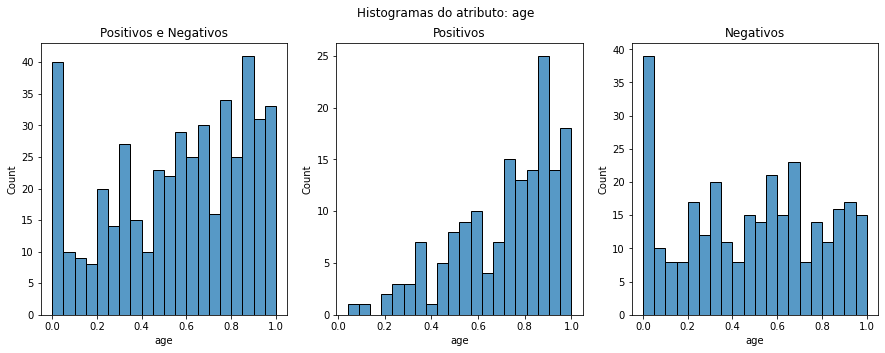

In [53]:
tested_positive = df_normalized.query('chd == 1')
tested_negative = df_normalized.query('chd == 0')

preditor_selecionado = 'age' #@param ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age']

fig, axes = plt.subplots(1,3, figsize=(15,5))
fig.suptitle('Histogramas do atributo: {}'.format(preditor_selecionado))
sns.histplot(ax = axes[0], data=df_normalized, x=preditor_selecionado, bins=20)
axes[0].set_title("Positivos e Negativos")

sns.histplot(ax = axes[1],data=tested_positive, x=preditor_selecionado, bins=20)
axes[1].set_title("Positivos")

sns.histplot(ax = axes[2],data=tested_negative, x=preditor_selecionado, bins=20)
axes[2].set_title("Negativos")
plt.show()


Percebe-se (para mim isso não era trivial) que o resultado dos histogramas tanto para dados não normalizados quanto para normalizados é o mesmo

# Funções e declarações para as questões 2, 3, 4 e 5

## Referências

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html

https://towardsdatascience.com/how-to-plot-a-confusion-matrix-from-a-k-fold-cross-validation-b607317e9874





In [54]:
#@title Funções
import numpy as np
import copy as cp

import matplotlib.pyplot as plt
from typing import Tuple
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn import tree # for decision tree models
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay


def cross_val_predict(model, kfold : KFold, X : np.array, y : np.array) -> Tuple[np.array, np.array, np.array]:
    
    model_ = cp.deepcopy(model) # copy the model
    
    no_classes = len(np.unique(y))  # 2
    
    actual_classes = np.empty([0], dtype=int) # armazena os rótulos reais (atuais)
    predicted_classes = np.empty([0], dtype=int) # armazena os rótulos predizidos
    predicted_proba = np.empty([0, no_classes])  # armazena as probabilidades do rótulo ser predizido 0 ou 1

    scores = [] # array para armazenar os AUC Scores de cada fold
    legends = [] # array de legendas para armazenar e mostrar o resultado de cada curva AUC ROC

    plt.figure(figsize=(10,10))
    i = 1
    for train_index, test_index in kfold.split(X):

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]


        actual_classes = np.append(actual_classes, y_test)

        model_.fit(X_train, y_train) # treinamento do modelo
        predicted_classes = np.append(predicted_classes, model_.predict(X_test))

       
        y_pred_chd_prob = model_.predict_proba(X_test)[:,1] # probabilidade do rótulo ser 1 (YES CHD)
     
        try:
            predicted_proba = np.append(predicted_proba, model_.predict_proba(X_test), axis=0)
            auc_score = roc_auc_score(y_test, y_pred_chd_prob)            
            scores.append(auc_score) # array with the scores of each auc
            legends.append('O fold {0} teve um AUC de {1} '.format(i,auc_score))
            fpr, tpr, _ = roc_curve(y_test, y_pred_chd_prob)
            
            plt.plot(fpr,tpr)
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Curva ROC AUC')

        except:
            predicted_proba = np.append(predicted_proba, np.zeros((len(X_test), no_classes), dtype=float), axis=0)
        
        
        plt.legend(legends)
        i+=1
    mean_scores = np.mean(scores)
    print("Média dos AUC Scores: {}".format(mean_scores))
    return actual_classes, predicted_classes, predicted_proba

def plot_confusion_matrix(actual_classes : np.array, predicted_classes : np.array, sorted_labels : list):

    matrix = confusion_matrix(actual_classes, predicted_classes, labels=sorted_labels)
    
    plt.figure(figsize=(12.8,6))

    # mapa de calor para váriar as cores da matriz de confusão com base no valor da célula
    sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues", fmt="g")
    
    plt.xlabel('Predicted'); 
    plt.ylabel('Actual'); 
    plt.title('Confusion Matrix agregando os resultados dos 10 folds (0 is for NO CHD and 1 is for YES CHD)')
    plt.show()


  


In [55]:
#@title Declarações para separar os atributos da classe
X=df.drop(columns='chd') # equal - Why has to put .values?
X=df.loc[:,'sbp' : 'age'] # to this one
y = df['chd']

# Questão 2 - CART



Média dos AUC Scores: 0.7295307370818831


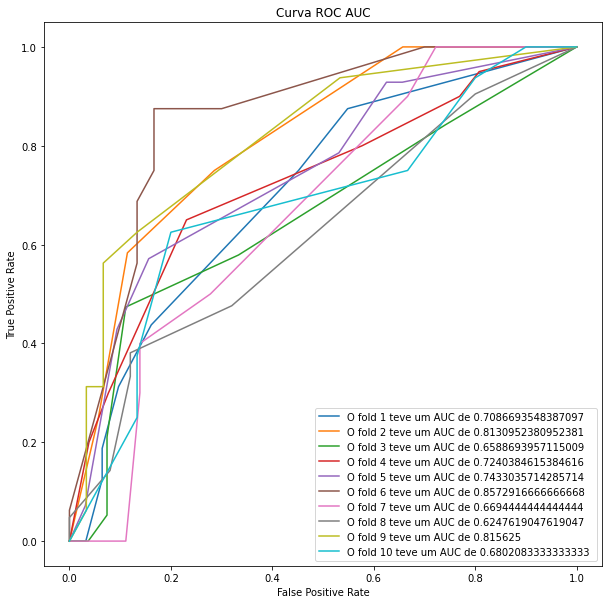

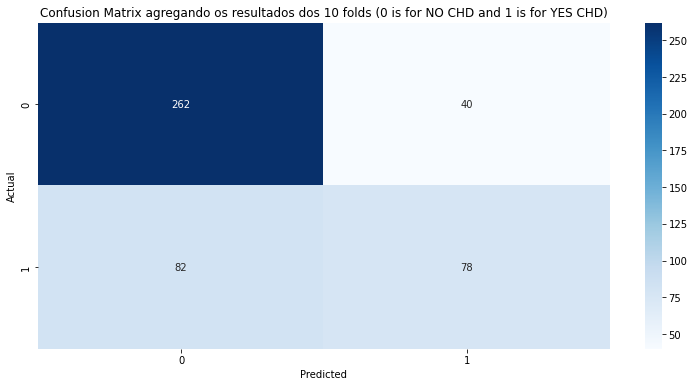

In [56]:
#@title Main

kfold = KFold(n_splits=10, random_state=1, shuffle=True) # Validação Cruzada de 10
cart_model = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3, random_state=0)

actual_classes, predicted_classes, predicted_proba = cross_val_predict(cart_model, kfold, X.to_numpy(), y.to_numpy()) 

# Confusion Matrix

plot_confusion_matrix(actual_classes, predicted_classes, [0,1])



A partir das curvas de cada fold plotadas, percebe-se que o fold 6 é o conjunto de dados de treinamento/teste mais indicado para o **modelo CART**. Pois seu AUC (Area Under Curve) foi o maior de todos.

Além disso, a média do AUC Score deu 0.7295307370818831.

A partir da matriz de confusão gerada contendo 462 testes (10 folds de 46 casos de teste) percebe-se que:

1. A acurácia foi de 74%
3. A precisao para casos negativos foi de 76%
2. A precisão para casos positivos foi de 80%

Surpreende a precisão para casos positivos ser maior que negativos pois existem muito mais amostras rotuladas como negativas (65%) em relação a positivas (35%)

Por fim, espera-se que, ao utilizar Florestas Randômicas, a acurácia, precisão e AUC Score melhore.



# Questão 3 - Random Forest com todos preditores

Média dos AUC Scores: 0.7383984844503731


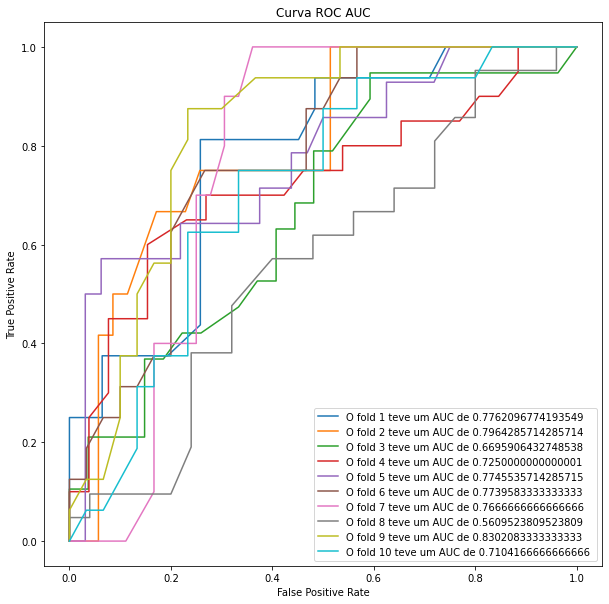

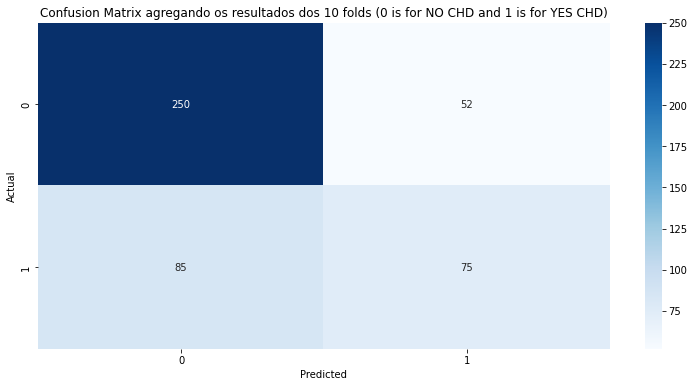

In [57]:
#@title Main

from sklearn.ensemble import RandomForestClassifier

kfold = KFold(n_splits=10, random_state=1, shuffle=True) # Validação Cruzada de 10

rf_all_model = RandomForestClassifier(n_estimators=100, max_features=9)

actual_classes, predicted_classes, predicted_proba = cross_val_predict(rf_all_model, kfold, X.to_numpy(), y.to_numpy()) 

# Confusion Matrix

plot_confusion_matrix(actual_classes, predicted_classes, [0,1])




A partir das curvas de cada fold plotadas, percebe-se que o fold 9 é o conjunto de dados de treinamento/teste mais indicado para o **modelo de floresta randômica com todos os preditores**. Pois seu AUC (Area Under Curve) foi o maior de todos.

Além disso, a média do AUC Score deu  0.7289153653580118, semelhante ao resultado utilizando o CART.

A partir da matriz de confusão gerada contendo 460 testes (10 folds de 46 casos de teste) percebe-se que:

1. A acurácia foi de 69%
3. A precisao para casos negativos foi de 78%
2. A precisão para casos positivos foi de 73%

Nesse caso, a precisão para casos negativos foi maior do que para casos negativos. Satisfazendo o que era esperado devido ao desequilibrio dos rótulos.

Como as Florestas Randomicas utilizam vários estimadores ao mesmo tempo (100 nesse caso) para escolher o melhor para predição, era esperado que ele tivesse um resultado melhor que o CART. Porém, isso não foi observado. 

Será visto posteriormente se esse resultado se mantém utilizando a raiz quadrada dos preditores.



# Questão 4 - Random Forest com 3 preditores

Média dos AUC Scores: 0.745754323429196


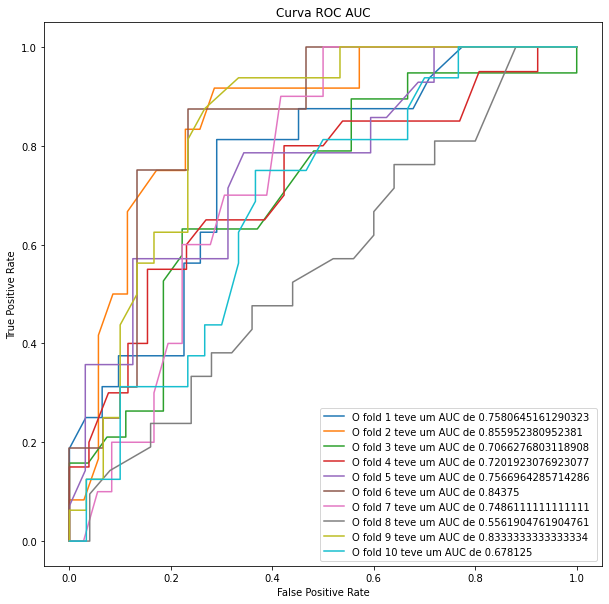

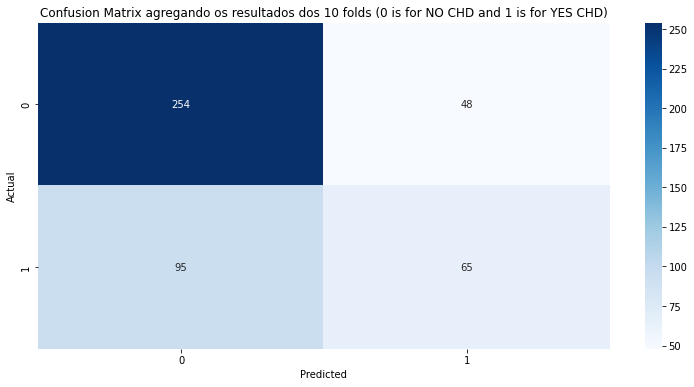

In [58]:
#@title Main

from sklearn.ensemble import RandomForestClassifier

kfold = KFold(n_splits=10, random_state=1, shuffle=True) # Validação Cruzada de 10

rf_all_model = RandomForestClassifier(n_estimators=100, max_features=3)

actual_classes, predicted_classes, predicted_proba = cross_val_predict(rf_all_model, kfold, X.to_numpy(), y.to_numpy()) 

# Confusion Matrix

plot_confusion_matrix(actual_classes, predicted_classes, [0,1])




Semelhante à floresta randômica anterior (em que foi utilizado todos os preditores), percebe-se que o fold 9 é o conjunto de dados de treinamento/teste mais indicado para **esse caso em que está se utilizando a raiz quadrada dos preditores.** Pois seu AUC (Area Under Curve) foi o maior de todos.

Nesse caso a média do AUC Score deu 0.7372251382954906. Melhor resultado até agora.

A partir da matriz de confusão gerada contendo 462 testes (10 folds de 46 casos de teste) percebe-se que:

1. A acurácia foi de 70%
3. A precisão para casos negativos foi de 76%
2. A precisão para casos positivos foi de 70%

Nesse caso, a precisão para casos negativos foi maior do que para casos negativos. Satisfazendo o que era esperado devido ao desequilibrio dos rótulos.

Diferente do modelo de floresta randômica anterior, esse modelo teve um desempenho melhor, sendo o melhor de todos os testados. Com o maior **AUC Score**, **acurácia** e **precisão** entre os três modelos

Será visto posteriormente se esse resultado se mantém utilizando a raiz quadrada dos preditores.



# Questão 5 - As 2 variáveis mais importantes/relevantes

Como o modelo que teve o melhor resultado foi a Floresta Randômica com a raiz quadrada das features, será plotado a importância das features para ele.

Text(0.5, 1.0, 'Features mais relevantes para predição')

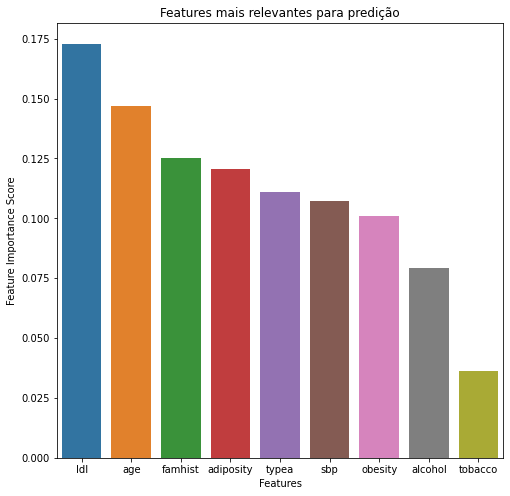

In [59]:
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples

# é isto aqui o responsável
X_not_processed=df_not_preprocessed[['sbp','famhist','tobacco','ldl','adiposity','typea','obesity','alcohol','age']]
y_not_processed=df_not_preprocessed['chd'].values

X_train, X_test, y_train, y_test = train_test_split(X_not_processed, y_not_processed, test_size=0.1, random_state=0)

clf = RandomForestClassifier(n_estimators=100, max_features=3)

clf.fit(X_train,y_train)

feature_names = df.drop(['chd'], axis=1).keys()


feature_imp = pd.Series(clf.feature_importances_, index=feature_names).sort_values(ascending=False)
feature_imp

plt.figure(figsize=(8,8))
sns.barplot(x=feature_imp.index, y=feature_imp)
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title("Features mais relevantes para predição")




Observando o gráfico, percebe-se que as features mais importantes para esse modelo é o ldl e age.

A análise das features acima mostra o que era esperado quanto ao atributo 'age' pois na questão 1, foi visto que quanto maior a idade, maior a chance de desenvolver chd. Então parecia ser um ótimo preditor. Porém, só foi possível perceber que o 'ldl' é um bom preditor a partir da análise feita na **Questão 5**